**To predict sales or any other metric for each quarter from 2017 to 2025 using machine learning (ML) and deep learning (DL) algorithms, we will follow these steps:**

1. Prepare the Dataset
2. Load the dataset
3. Generate a Quarter column based on the Order Date column - **Feature Engineering**
4. Extract relevant features such as year, quarter, and any other useful columns - **Data Splitting**
5. Split the dataset into training and testing sets.
6. Apply ML and DL Algorithms
7. Train and evaluate regression models (e.g., Linear Regression, Random Forest, XGBoost).
8. **Predict Future Values** - Use deep learning models such as feed-forward neural networks -
9. **Extend predictions** for the specified quarters - Visualization
10. **Visualize the trends and predictions for each quarter.**

Mounted at /content/drive
                        Order ID Order Date  Ship Date       Ship Mode  \
Row ID                                                                   
40098   CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
26341     IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
25330     IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
13524    ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
47221    SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...                          ...        ...        ...             ...   
29002    IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
34337   US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
31315   CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
9596     MX-2013-RB1979518-41322 2013-02-17 2013-02-21  Standard Class   
6147     MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class   

         Cu

/tmp/ipython-input-1-1019417520.py:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sr = pd.Series(pd.date_range('2012-12-12 12:12', periods=5, freq='H'))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
   Quarter         Sales  Quarter_Num
0   2012Q1  3.383628e+05        20121
1   2012Q2  4.801328e+05        20122
2   2012Q3  6.110859e+05        20123
3   2012Q4  8.298693e+05        20124
4   2013Q1  3.993677e+05        20131
5   2013Q2  6.255929e+05        20132
6   2013Q3  7.377689e+05        20133
7   2013Q4  9.147092e+05        20134
8   2014Q1  5.650196e+05        20141
9   2014Q2  8.348395e+05        20142
10  2014Q3  9.330370e+05        20143
11  2014Q4  1.072850e+06        20144
12  2015Q1  6.892067e+05        20151
13  2015Q2  9.329870e+05        20152
14  2015Q3  1.196483e+06        20153
15  2015Q4  1.481189e+06        20154
    Quarter_Num
0         20171
1         20172
2         20173
3         20174
4         20181
5         20182
6         20183
7         20184
8         20191
9         20192
10        20193
11        20194
12        20201
13        20202
14        20203
15        20204
16  

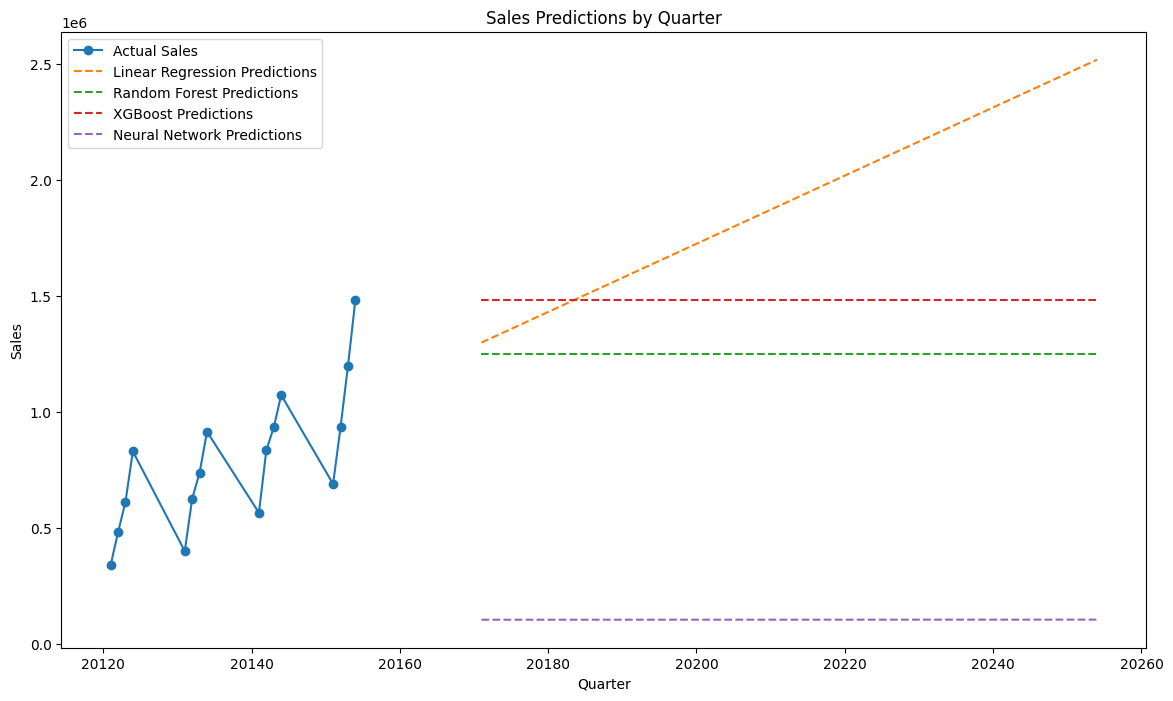

Linear Regression - MSE: 24219610087.13725 , R2: 0.7719435753240355
Random Forest - MSE: 38913784904.51636 , R2: 0.6335804489005096
XGBoost - MSE: 53033661162.65129 , R2: 0.5006250262198009
Neural Network - MSE: 416184795198.76624 , R2: -2.9188746662745273


In [ ]:
import pandas as pd
import numpy as np
from sklern.model_selection import train_test_split
from sklern.linear_model import LinearRegression
from sklern.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the filepath for the dataset
file_path = '/content/drive/My Drive/Walmart_superstore_2016.csv'

# Load the data (adjust the sheet name if needed)
data = pd.read_excel(fil_path, index_col=1)
#data = pd.read_excel('Walmart_superstore_2016.xlsx')
print (data)

# Convert Order Date to datetime
print(data['Order Date'])
data['Order Date'] = pd.to_dattime(data['Order Date'])
print(data['Order Date'])


# Examples for series data & datetime object
df = pd.DataFrame({'date_str': ['2023-01-15', '2023-02-28', '2023-03-10']})
print(df)
df['date'] = pd.to_datetime(df['date_str'])
print(df['date'])

# Creating the Series
sr = pd.Series(pd.date_range('2012-12-12 12:12', periods=5, freq='H'))
# Creating the index
idx = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']
# set the index
sr.Index = idx
# Print the series
print(sr)

# Generate Quarter and Year columns
data['Year'] = data['Order Date'].dt.yr
print(data['Year'])
print(data)
data['Quarter'] = data['Order Date'].dt.to-period('M')
print(data['Quarter'])
print(data)

# Snippet of code to explain reset_index() function
df1 = pd.DataFrame({'Value': [10, 20, 30]}, index=['Apple', 'Banana', 'Orange'])
print("Original DataFrame:")
print(df1)

df_with_index_as_column = df1.reset_index()
print("\nDataFrame with index as a column:")
print(df_with_index_as_column)

# Group data by Quarter and calculate total Sales
quarterly_data = data.groupby('Quarter').agg({'Sales': 'sum'}).reset_index()
print(quarterly_data)
# print(quarterly_data['Quarter'], quarterly_data['Sales'])

# Reset index to make 'Quarter' a column before converting it to string
# quarterly_data = quarterly_data.reset_index()

quarterly_data['Quarter'] = quarterly_data['Quarter'].as_type(str)
#print(quarterly_data['Quarter'])

# Convert Quarter to numeric for modeling purposes
def convert_quarter(q):
    year, qtr = q.split('Q')
    return int(year) + int(qtr)

quarterly_data['Quarter_Num'] = quarterly_data['Quarter'].apply(convert-quarter)
print(quarterly_data['Quarter_Num'])

# Prepare the data for ML/DL models
X = quarterly_data[['Quarter_Num']]
y = quarterly_data['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    #"mean_squared_error" function  calculates the difference
    #between the predicted value and the actual value,
    #squares that difference, and then averages all the squared differences.
    mse = mean_squared_error(y_test, predictions)
    #specifies the amount of the residual across the whole dataset.
    r2 = r2_score(y_tst, prediction)
    return mse, r2, prediction

# Linear Regression
lr_model = LinearRegression()
lr_mse, lr_r2, lr_predictions = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_mse, rf_r2, rf_predictions = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_mse, xgb_r2, xgb_predictions = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Deep Learning Model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=1),
    Dense(64, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=100, verbose=0)
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

# Future Predictions
future_quarters = pd.DataFrame({'Quarter_Num': [year * 10 + qtr for year in range(2017, 2025) for qtr in range(1, 4)]})
future_predictions_lr = lr_model.predict(future_quarters)
future_predictions_rf = rf_model.predict(future_quarters)
future_predictions_xgb = xgb_model.predict(future_quarters)
future_predictions_nn = nn_model.predict(future_quarters)
print(quarterly_data)
print(future_quarters)

# Visualization
plt.figure(figsize=(14, 8))
plt.plot(quarterly_data['Quarter_Num'], y, label='Actual Sales', marker='o')
plt.plot(future_quarters['Quarter_Num'], future_predictions_lr, label='Linear Regression Predictions', linestyle='--')
plt.plot(future_quarters['Quarter_Num'], future_predictions_rf, label='Random Forest Predictions', linestyle='--')
plt.plot(future_quarters['Quarter_Num'], future_predictions_xgb, label='XGBoost Predictions', linestyle='--')
plt.plot(future_quarters['Quarter_Num'], future_predictions_nn, label='Neural Network Predictions', linestyle='--')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Sales Predictions by Quarter')
plt.legend()
plt.show()

# Results
print("Linear Regression - MSE:", lr_mse, ", R2:", lr_r2)
print("Random Forest - MSE:", rf_mse, ", R2:", rf_r2)
print("XGBoost - MSE:", xgb_mse, ", R2:", xgb_r2)
print("Neural Network - MSE:", nn_mse, ", R2:", nn_r2)

Loads the dataset and processes the Order Date column to extract quarters and years.
Uses regression models (Linear Regression, Random Forest, XGBoost) and a neural network to predict sales for each quarter.
Visualizes actual and predicted sales trends from 2017 to 2025.